In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split

feature_scaler = joblib.load('./artifacts/feature_scaler.pkl')
target_scaler = joblib.load('./artifacts/target_scaler.pkl')

df = pd.read_csv("../data/final_merged.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close,High,Low,Open,Volume,avg_sentiment_score,news_count
0,2021-07-19,139.404251,140.989624,138.640930,140.676459,121434600,0.000000,0.0
1,2021-07-20,143.025162,143.954862,139.903380,140.392689,96350000,0.994026,4.0
2,2021-07-21,142.291168,143.005571,141.537642,142.418393,74993500,0.000000,0.0
3,2021-07-22,143.661285,145.031346,142.692447,142.819672,77338200,0.997748,5.0
4,2021-07-23,145.383606,145.540189,143.778672,144.395206,71447400,0.996606,3.0


In [12]:
df.dtypes

Date                   datetime64[ns]
Close                         float64
High                          float64
Low                           float64
Open                          float64
Volume                          int64
avg_sentiment_score           float64
news_count                    float64
dtype: object

In [13]:
target_column = 'Close'
feature_columns = ['High', 'Low', 'Open', 'Volume', 'avg_sentiment_score', 'news_count']

features = df[feature_columns].values
target = df[[target_column]].values

In [14]:
features_scaled = feature_scaler.transform(features)
target_scaled = target_scaler.transform(target)

c:\Users\Juls\Desktop\stock-news-predictor\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Juls\Desktop\stock-news-predictor\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [15]:
sequence_length = 30

def create_sequences(features, target, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(features)):
        X.append(features[i-sequence_length:i])
        y.append(target[i])
    return np.array(X), np.array(y)

X, y = create_sequences(features_scaled, target_scaled, sequence_length)

In [16]:
test_size = 0.2
val_size = 0.15

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
val_size_adjusted = val_size / (1 - test_size)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size_adjusted, shuffle=False)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (195, 30, 6)
y_test shape: (195, 1)


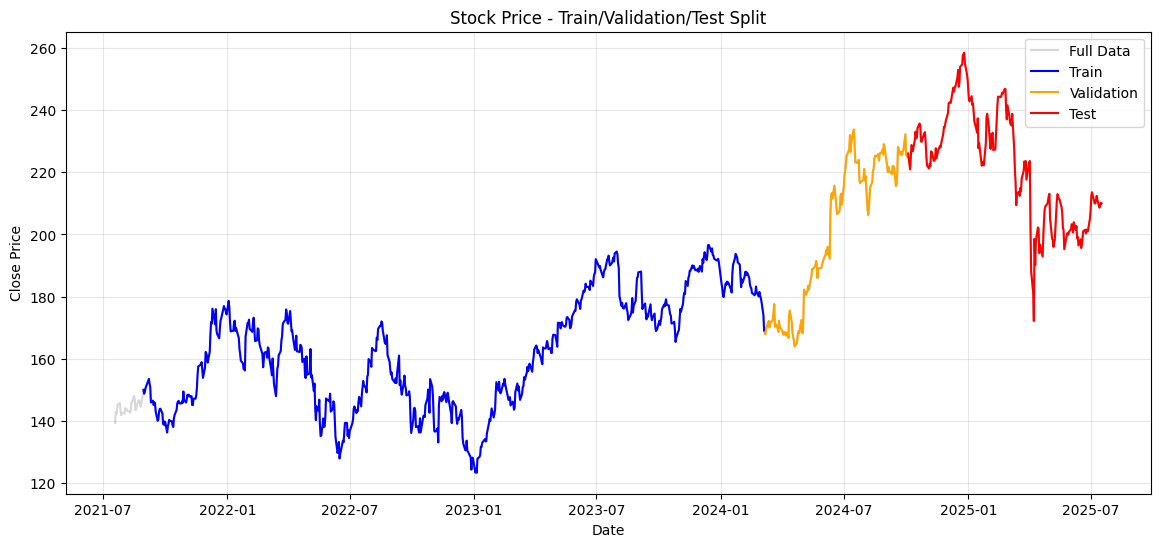

In [17]:
plt.figure(figsize=(14,6))

# Masks
train_dates = df['Date'].iloc[sequence_length:sequence_length+X_train.shape[0]]
val_dates = df['Date'].iloc[sequence_length+X_train.shape[0]:sequence_length+X_train.shape[0]+X_val.shape[0]]
test_dates = df['Date'].iloc[sequence_length+X_train.shape[0]+X_val.shape[0]:]

plt.plot(df['Date'], df['Close'], alpha=0.3, color='gray', label='Full Data')

plt.plot(train_dates, df['Close'].iloc[sequence_length:sequence_length+X_train.shape[0]], color='blue', label='Train')
plt.plot(val_dates, df['Close'].iloc[sequence_length+X_train.shape[0]:sequence_length+X_train.shape[0]+X_val.shape[0]], color='orange', label='Validation')
plt.plot(test_dates, df['Close'].iloc[sequence_length+X_train.shape[0]+X_val.shape[0]:], color='red', label='Test')

plt.title('Stock Price - Train/Validation/Test Split')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [18]:
final_X = X
final_y = y

np.save('./artifacts/final_X.npy', final_X)
np.save('./artifacts/final_y.npy', final_y)

print("Saved final_X and final_y to ./artifacts/")
print("final_X shape:", final_X.shape)
print("final_y shape:", final_y.shape)

Saved final_X and final_y to ./artifacts/
final_X shape: (974, 30, 6)
final_y shape: (974, 1)
